[6.4 4.8]


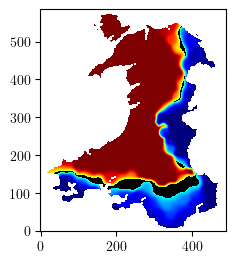

In [1]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
import matplotlib.font_manager as fm
from mpl_toolkits.axes_grid1.inset_locator import (inset_axes, InsetPosition,
                                                  mark_inset)


import matplotlib.pyplot as plt
import matplotlib.cbook as cbook
from matplotlib_scalebar.scalebar import ScaleBar

import os

matplotlib.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
})

# plt.rcParams["font.family"] = "serif"
# plt.rcParams["font.serif"] = ["Times New Roman"] + plt.rcParams["font.serif"]
# matplotlib.use("pgf")

format = "png"
colorbar = "colorbar"
save = True
n = 10
fig, ax = plt.subplots(1, 1)
ax.set_aspect('equal')
isogloss = "isogloss"
path = "../data"

ksa10 = [2500, 54500, 81500]    # alpha = 1.0
# kssa17 = [8000, 28000, 55000]    # alpha = 1.7
kssa17 = [8000]
filenames = []
for k in kssa17:
    # nametemplate = f"walesICbook5Alpha1.0Beta1.1SigmavarFactor1Deltat0.0004Tmax500.0MEMORY_1_{k}.npy"
    nametemplate = f"walesICbook5Alpha1.7Beta1.1SigmavarFactor1Deltat0.0004Tmax500.0MEMORY_1_{k}.npy"
    filenames.append(nametemplate)

includedRegion = np.load("wales_mask.npy").astype(bool)[:586, 50:540]
wales = np.load("wales_country_mask.npy")[:586, 50:540]
wales.shape

for i, filename in enumerate(filenames):

    if i == 0:
        s = fig.get_size_inches()
        print(s)
        fig.set_size_inches(float(s[0])*0.85, float(s[1])*0.6*0.85/0.85)

    savename = f"mWales{i}.pdf"
    filepath = os.path.join(path, filename)
    savepath = os.path.join(path, savename)
    m = np.load(filepath)
    m = m[:586, 50:540]
    m[~wales] = np.nan
    im = ax.imshow(m, origin='lower', cmap=plt.cm.jet, vmin = 0.0, vmax = 1.0)  # Here make an AxesImage rather than contour
    if isogloss == "isogloss":
        if i == 1:
            isogloss_loc = np.where(np.abs(m - 0.5) < 0.15)
        else:
            isogloss_loc = np.where(np.abs(m - 0.5) < 0.15)
        isogloss_array = np.zeros_like(m)
        isogloss_array.fill(np.nan)
        isogloss_array[isogloss_loc] = 255
        ax.imshow(isogloss_array, cmap="binary", origin="lower", vmin=0., vmax=255)

plt.show()


0.9

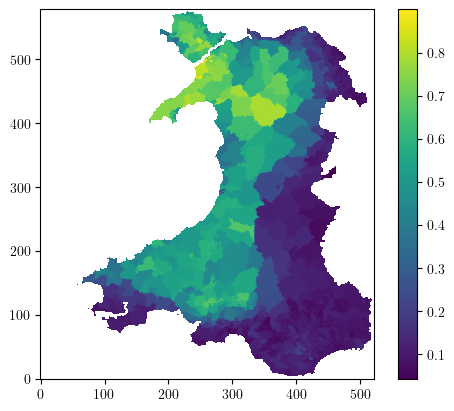

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image
import matplotlib

matplotlib.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
})


d = Image.open("wales_current_welsh_usage.tif")
mask = Image.open("wales_current_usage_mask.tif")
d = np.array(d) * 1/100
mask = np.array(mask).astype(bool)
d = np.flip(d, axis=0)
mask = np.flip(mask, axis=0)
d[~mask] = np.nan

fig, ax = plt.subplots()

plt.imshow(d, origin="lower")
cb = plt.colorbar()

np.nanmax(d)

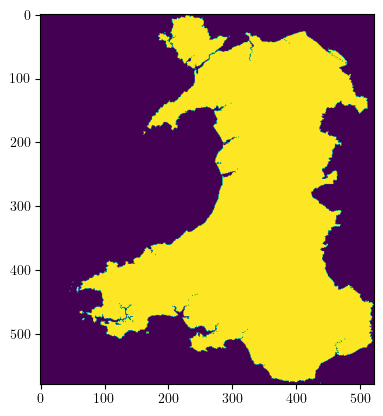

In [3]:
d = Image.open("attempt2_wales_current_welsh_usage.tif")
d = np.array(d)
plt.imshow(d)

In [4]:
diff=m-d
plt.imshow(d)

ValueError: operands could not be broadcast together with shapes (586,490) (579,522) 

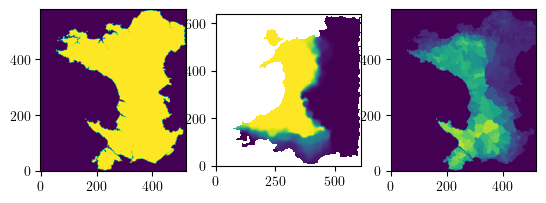

In [5]:
fig, axs = plt.subplots(1,3)

mask = Image.open('attempt2_wales_country_mask.tif')
usage = Image.open('wales_current_welsh_usage.tif')

k = 8000
freq = np.load(f"../data/walesICbook5Alpha1.7Beta1.1SigmavarFactor1Deltat0.0004Tmax500.0MEMORY_1_{k}.npy")


mask = np.array(mask)
usage = np.array(usage)



axs[0].imshow(mask, alpha = 1, origin="lower")
axs[1].imshow(freq, origin='lower')
axs[2].imshow(usage, alpha=1, origin='lower')


(579, 522)
(579, 522)


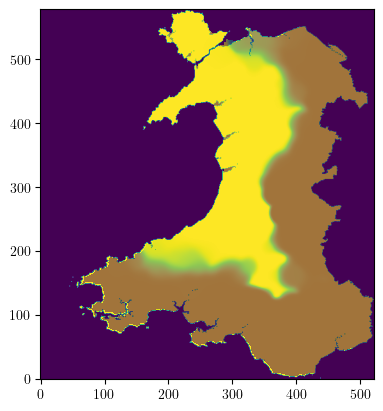

In [6]:
# Fixing size of freq layer
fig, ax = plt.subplots()

mask = Image.open("attempt2_wales_country_mask.tif")
mask = np.array(mask).astype(bool)
k = 28000
freq = np.load(f"../data/walesICbook5Alpha1.7Beta1.1SigmavarFactor1Deltat0.0004Tmax500.0MEMORY_1_{k}.npy")

mask_shape = mask.shape
print(mask_shape)
freq = freq[:mask_shape[0], :mask_shape[1]]
print(freq.shape)

plt.imshow(np.flip(mask, axis=0), origin='lower')
plt.imshow(freq, origin='lower', alpha=0.5)
plt.show();


In [14]:
# names = os.listdir('walesICbook5Alpha1.2Beta1.1SigmavarFactor2Deltat0.0004Tmax500.0_0')
names = os.listdir('walesICbook5Alpha2.3Beta1.1SigmavarFactor2Deltat0.0004Tmax500.0_0')
nums = [name.split('_')[-1].replace('.npy','') for name in names]
nums = np.array(nums).astype(int)
nums = np.array(sorted(nums))[:len(nums)//2]
nums

array([     0,    500,   1000, ..., 623500, 624000, 624500])

started


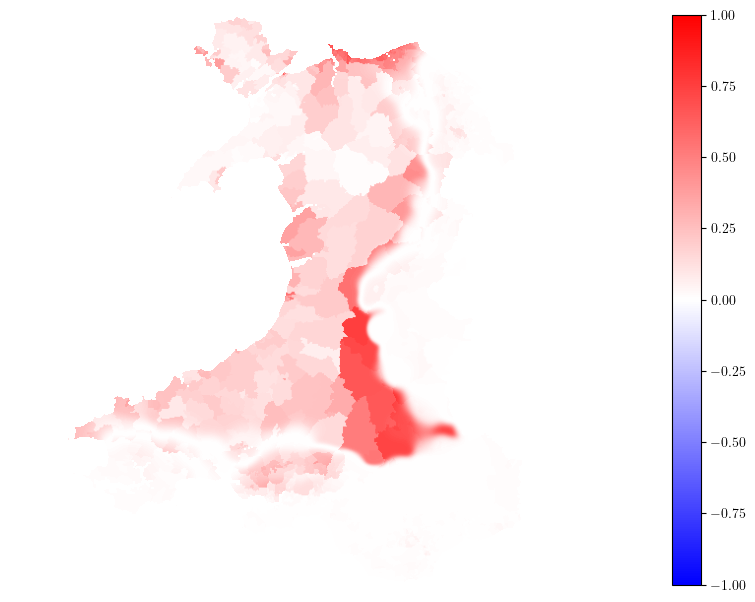

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [15]:
# ks = [4000, 8000, 14500, 20000, 22500, 25000, 28000, 34500, 40000, 50000, 55000, 56000, 60000, 64000]
ks = nums
# gridspec = {'width_ratios': [1, 1], 'height_ratios': [1]}
fig, axs = plt.subplots(1, 1, constrained_layout=True, figsize=(30,6))

# Get current usage
usage = Image.open('wales_current_welsh_usage.tif')
usage = np.array(usage) * 0.01
usage = np.flip(usage, axis=0)

usage_mask = Image.open("wales_current_usage_mask.tif")
usage_mask = np.array(usage_mask).astype(bool)
usage_mask = np.flip(usage_mask, axis=0)
usage[~usage_mask] = np.nan



freq_mask = Image.open("attempt2_wales_country_mask.tif")
freq_mask = np.array(freq_mask).astype(bool)
freq_mask = np.flip(freq_mask, axis=0)
mask_shape = freq_mask.shape

total_diffs = []
ax_num = 0
all_nums = []
alphas = [1.2, 1.7, 2.3, 2.5]

print("started")
for alpha in alphas:
    try:
        names = os.listdir(f'walesICbook5Alpha{alpha}Beta1.1SigmavarFactor2Deltat0.0004Tmax500.0_0')
    except FileNotFoundError:
        names = os.listdir(f'../walesICbook5Alpha{alpha}Beta1.1SigmavarFactor2Deltat0.0004Tmax500.0_0')
    nums = [name.split('_')[-1].replace('.npy','') for name in names]
    nums = np.array(nums).astype(int)
    nums = np.array(sorted(nums))[:len(nums)//2]
    nums
    ks=nums
    all_nums.append(nums)
    
    
    alpha_diffs = []
    for i, k in enumerate(ks):
        print(f'{i} out of {len(nums)} completed', end = '\r')
    #     ax = axs[i]

    #     freq = np.load(f"walesICbook5Alpha1.2Beta1.1SigmavarFactor2Deltat0.0004Tmax500.0_0/walesICbook5Alpha1.2Beta1.1SigmavarFactor2Deltat0.0004Tmax500.0MEMORY_0_{k}.npy")
        try:
            freq = np.load(f"walesICbook5Alpha{alpha}Beta1.1SigmavarFactor2Deltat0.0004Tmax500.0_0/walesICbook5Alpha{alpha}Beta1.1SigmavarFactor2Deltat0.0004Tmax500.0MEMORY_0_{k}.npy")
        except FileNotFoundError:
            freq = np.load(f"../walesICbook5Alpha{alpha}Beta1.1SigmavarFactor2Deltat0.0004Tmax500.0_0/walesICbook5Alpha{alpha}Beta1.1SigmavarFactor2Deltat0.0004Tmax500.0MEMORY_0_{k}.npy")
        freq = freq[:mask_shape[0], :mask_shape[1]]
        freq[~freq_mask] = np.nan

        usage = usage/(np.nanmax(usage))
        diff = (usage - freq)**2 #SQUARED DIFF TO MAKE FLATTER OR SOMETHING
        total_diff = np.nansum(diff)
        alpha_diffs.append(total_diff)

        if k in [21000]:
            ax = axs
            diff_ = ax.imshow(diff, origin='lower', cmap='bwr', vmin=-1, vmax=1)
            ax_num += 1

    # for ax in axs:
    ax.axis('off')

    plt.tight_layout()
    # cax = axs[2]
    # cax = fig.add_axes([1.05, 0.2, 0.03, 0.6], transform = ax.transAxes)
    cb = fig.colorbar(diff_,)
    # c.set_ylim(-0.9, 0.9)


    plt.show()
    total_diffs.append(alpha_diffs)

    # print(total_diffs)

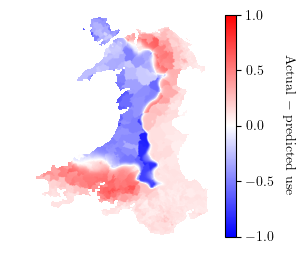

In [41]:
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image
import matplotlib

matplotlib.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
})

usage = Image.open('wales_current_welsh_usage.tif')
usage = np.array(usage) * 0.01
usage = np.flip(usage, axis=0)

usage_mask = Image.open("wales_current_usage_mask.tif")
usage_mask = np.array(usage_mask).astype(bool)
usage_mask = np.flip(usage_mask, axis=0)
usage[~usage_mask] = np.nan

freq_mask = Image.open("attempt2_wales_country_mask.tif")
freq_mask = np.array(freq_mask).astype(bool)
freq_mask = np.flip(freq_mask, axis=0)
mask_shape = freq_mask.shape

# k=66500
# k=17500
k=21000
# freq = np.load(f"walesICbook5Alpha1.2Beta1.1SigmavarFactor2Deltat0.0004Tmax500.0_0/walesICbook5Alpha1.2Beta1.1SigmavarFactor2Deltat0.0004Tmax500.0MEMORY_0_{k}.npy")
# freq = np.load(f"../walesICbook5Alpha2.5Beta1.1SigmavarFactor2Deltat0.0004Tmax500.0_0/walesICbook5Alpha2.5Beta1.1SigmavarFactor2Deltat0.0004Tmax500.0MEMORY_0_{k}.npy")
freq = np.load(f"walesICbook5Alpha2.3Beta1.1SigmavarFactor2Deltat0.0004Tmax500.0_0/walesICbook5Alpha2.3Beta1.1SigmavarFactor2Deltat0.0004Tmax500.0MEMORY_0_{k}.npy")
    
freq = freq[:mask_shape[0], :mask_shape[1]]
freq[~freq_mask] = np.nan

# usage = usage/(np.nanmax(usage))
diff = usage - freq
total_diff = np.nansum(diff)


fig, ax = plt.subplots()

plt.imshow(diff, origin="lower", cmap='bwr', vmin=-1.0, vmax=1.0)
cb = plt.colorbar()
cb.set_label("Actual $-$ predicted use", rotation=270, labelpad=15)

ax.axis("off")
s = fig.get_size_inches()
fig.set_size_inches(float(s[0])*0.6, float(s[1])*0.6)
# plt.savefig("wales_residuals_2.5.pdf", bbox_inches="tight")
plt.show()


In [17]:
total_diffs
m = np.argmin(np.array(total_diffs)**2)
m

/var/folders/lz/qxwfh13s5nn60sfpks5n0d400000gp/T/ipykernel_93655/1290242131.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  m = np.argmin(np.array(total_diffs)**2)


TypeError: unsupported operand type(s) for ** or pow(): 'list' and 'int'

In [119]:
nums[35]
# nums[133]

17500

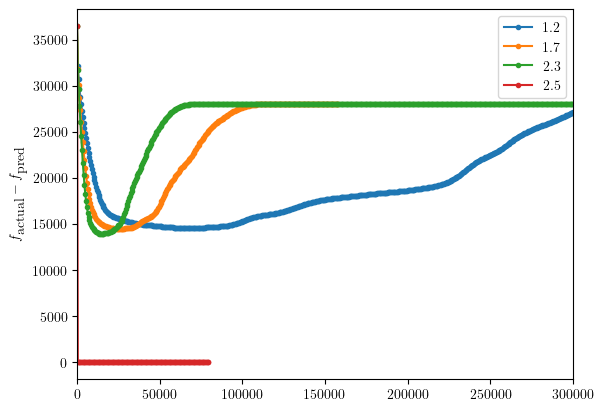

66500


In [20]:
for i, alpha in enumerate(alphas):
    plt.plot(all_nums[i], total_diffs[i], marker=".", label=alphas[i])

plt.ylabel(r"$f_\textrm{actual} - f_\textrm{pred}$")
plt.xlim(0,300000)
plt.legend()
plt.show()
print(nums[133])

[1.2, 1.7, 2.3, 2.5]

In [35]:
ind = np.argmin(total_diffs[2])
all_nums[2][ind]


15000

In [94]:
total_diffs[:len(total_diffs)//2 + 80]

[-52883.25101047382,
 -51964.12958459619,
 -51206.49627342001,
 -50537.214548480035,
 -49890.51613678129,
 -49247.47567768105,
 -48601.357081725815,
 -47949.49823231981,
 -47290.79341980389,
 -46624.79244334382,
 -45951.351319986505,
 -45270.48887532344,
 -44582.32643915711,
 -43887.06414428373,
 -43184.97393775505,
 -42476.39935870262,
 -41761.75804756001,
 -41041.54518400099,
 -40316.33710624391,
 -39586.79463372717,
 -38853.66576823009,
 -38117.787425324306,
 -37380.08576988425,
 -36641.574705941784,
 -35903.35209166676,
 -35166.59331571328,
 -34432.541977794426,
 -33702.4975604784,
 -32977.80015213317,
 -32259.81246910112,
 -31549.89961350422,
 -30849.40717623779,
 -30159.638437452355,
 -29481.83151540437,
 -28817.1373588372,
 -28166.599462887352,
 -27531.13611441066,
 -26911.525845849446,
 -26308.39660846009,
 -25722.218980548507,
 -25153.303520617133,
 -24601.80217506879,
 -24067.713469559847,
 -23550.89106331451,
 -23051.055133891106,
 -22567.80598918201,
 -22100.639273266926,
 

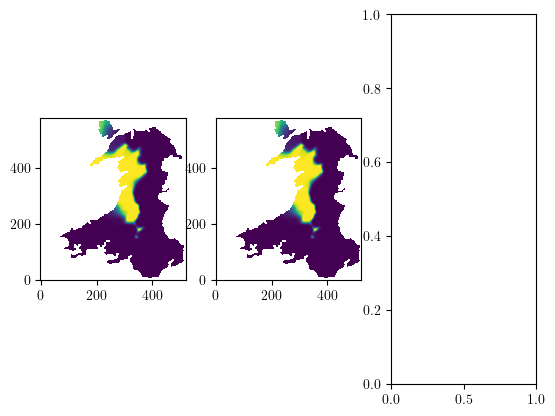

In [43]:
fig, axs = plt.subplots(1, 3)



freq_mask = Image.open("attempt2_wales_country_mask.tif")
freq_mask = np.array(freq_mask).astype(bool)
freq_mask = np.flip(freq_mask, axis=0)
mask_shape = freq_mask.shape

for i, n in enumerate([0, 230]):
    k = 55000
    freq = np.load(f"walesICbook5Alpha1.7Beta1.1SigmavarFactor2Deltat0.0004Tmax500.0_0/walesICbook5Alpha1.7Beta1.1SigmavarFactor2Deltat0.0004Tmax500.0MEMORY_0_{k}.npy")
    freq = freq[:mask_shape[0], :mask_shape[1]]
    freq[~freq_mask] = np.nan

#     ax = axs[0]
#     diff_ = ax.imshow(diff, origin='lower', cmap='viridis')
    
    ax = axs[i]
    ax.imshow(freq, origin='lower')

In [104]:
f=(2011-1850)/66500

In [108]:
1850+332500*f

2655.0

In [106]:
len(total_diffs)//2 + 40

665

In [107]:
nums[665]

332500

In [ ]:
from PIL import Image

w = Image.fromarray(wales)


In [ ]:
w2=w.resize(mask.shape)

In [ ]:
fig, axs = plt.subplots(1,2)

axs[0].imshow(w2, alpha = 1, origin="lower")
axs[1].imshow(np.flip(mask, axis=0), alpha=0.5, origin='lower')